In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
def position_encoding(pos: int, d: int):
    assert d > 0 and d % 2 == 0

    # 0 ... d/2 - 1
    indices = np.arange(0, d//2)
    sin = np.sin(pos / (10000**(2*indices/d)))[:, np.newaxis]
    cos = np.cos(pos / (10000**(2*indices/d)))[:, np.newaxis]

    encoding = np.concatenate((sin, cos), axis=1).reshape(-1)

    return encoding

In [142]:
position_encoding(1, 4)

array([0.84147098, 0.54030231, 0.00999983, 0.99995   ])

In [143]:
def position_encoding_batch(positions: np.ndarray, d:int) -> np.ndarray:
    assert d > 0 and d % 2 == 0

    N = len(positions)
    positions = positions[:, np.newaxis]
    indices = np.arange(d // 2, ).repeat(2)[np.newaxis, :].repeat(N, axis=0)
    indices = positions / (10000 ** (2*indices / d))

    indices[:, ::2] = np.sin(indices[:, ::2])
    indices[:, 1::2] = np.cos(indices[:, 1::2])

    return indices

In [144]:
encodings = position_encoding_batch(
    positions=np.arange(0, 500),
    d=500
)

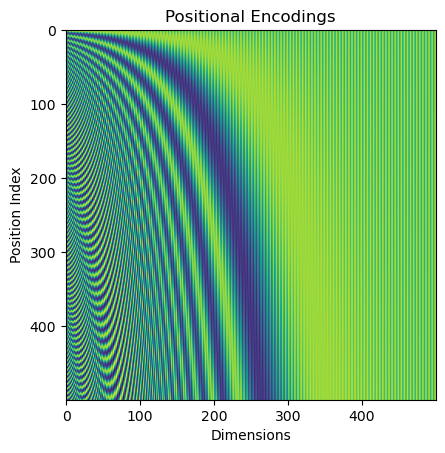

In [145]:
plt.title("Positional Encodings")
plt.xlabel("Dimensions")
plt.ylabel("Position Index")

plt.imshow(encodings)